In [1]:
# install additional package
!pip install -q supervision roboflow 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 32.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.5 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sigstore 3.6.1 requires rich~=13.0, but you have rich 14.0.0 which is incompatible.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.5, but you have notebook 6.5.4 which is incompatible.
google-col

In [2]:
# upgrade some package
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 17.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.2 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NVTQNFpQ6JqrCeAutntu")
project = rf.workspace("kunyit").project("data-testing-qmkxb")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Data-testing-2 in yolov11:: 100%|██████████| 106/106 [00:00<00:00, 8836.78it/s]


In [5]:
# Initialize dataset directory
DATASET = f'{HOME}/Data-testing-2'

In [6]:
!sed -i '$d' {DATASET}/data.yaml
!sed -i '$d' {DATASET}/data.yaml
!sed -i '$d' {DATASET}/data.yaml
!sed -i '$d' {DATASET}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {DATASET}/data.yaml

In [7]:
os.environ['WANDB_DISABLED'] = 'true'

In [8]:
model="/kaggle/input/e100b16/pytorch/default/1/best.pt"

In [9]:
%cd {HOME}

!yolo task=detect mode=val model="/kaggle/input/e100b16/pytorch/default/1/best.pt" data={DATASET}/data.yaml

/kaggle/working
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.116 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 17.8MB/s]
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 512.8±141.0 MB/s, size: 16.7 KB)
val: Scanning /kaggle/working/Data-testing-2/valid/labels... 50 images, 0 backgr
val: New cache created: /kaggle/working/Data-testing-2/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         50         50      0.795      0.825      0.836      0.689
                  Jah

In [10]:
%cd {HOME}
!yolo task=detect mode=predict model="//kaggle/input/e100b16/pytorch/default/1/best.pt" conf=0.5 source={DATASET}/valid/images save=true

/kaggle/working
Ultralytics 8.3.116 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/50 /kaggle/working/Data-testing-2/valid/images/IMG_20250424_085141_jpg.rf.8084320c74699149cbf8288d69674779.jpg: 640x640 1 Lengkuas, 192.2ms
image 2/50 /kaggle/working/Data-testing-2/valid/images/IMG_20250424_085145_jpg.rf.de311b1fa3c9f0bd8ca541800bbcca99.jpg: 640x640 1 Lengkuas, 158.3ms
image 3/50 /kaggle/working/Data-testing-2/valid/images/IMG_20250424_085201_jpg.rf.c37796ed3c08c710571ba5e3bea02aa2.jpg: 640x640 1 Lengkuas, 141.0ms
image 4/50 /kaggle/working/Data-testing-2/valid/images/IMG_20250424_085206_jpg.rf.3f9a56a6f30d0577a6bc39304de04814.jpg: 640x640 1 Lengkuas, 167.0ms
image 5/50 /kaggle/working/Data-testing-2/valid/images/IMG_20250424_085218_jpg.rf.e8790bc3d9efa24cd94a6b911bbfcf5c.jpg: 640x640 1 Lengkuas, 142.3ms
image 6/50 /kaggle/working/Data-testing-2/valid/images/IMG_20250424_085224_jpg.r

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}runs/detect/predict/images*.jpg')[:20]:
      display(Image(filename=image_path, height=600))
      print("\n")

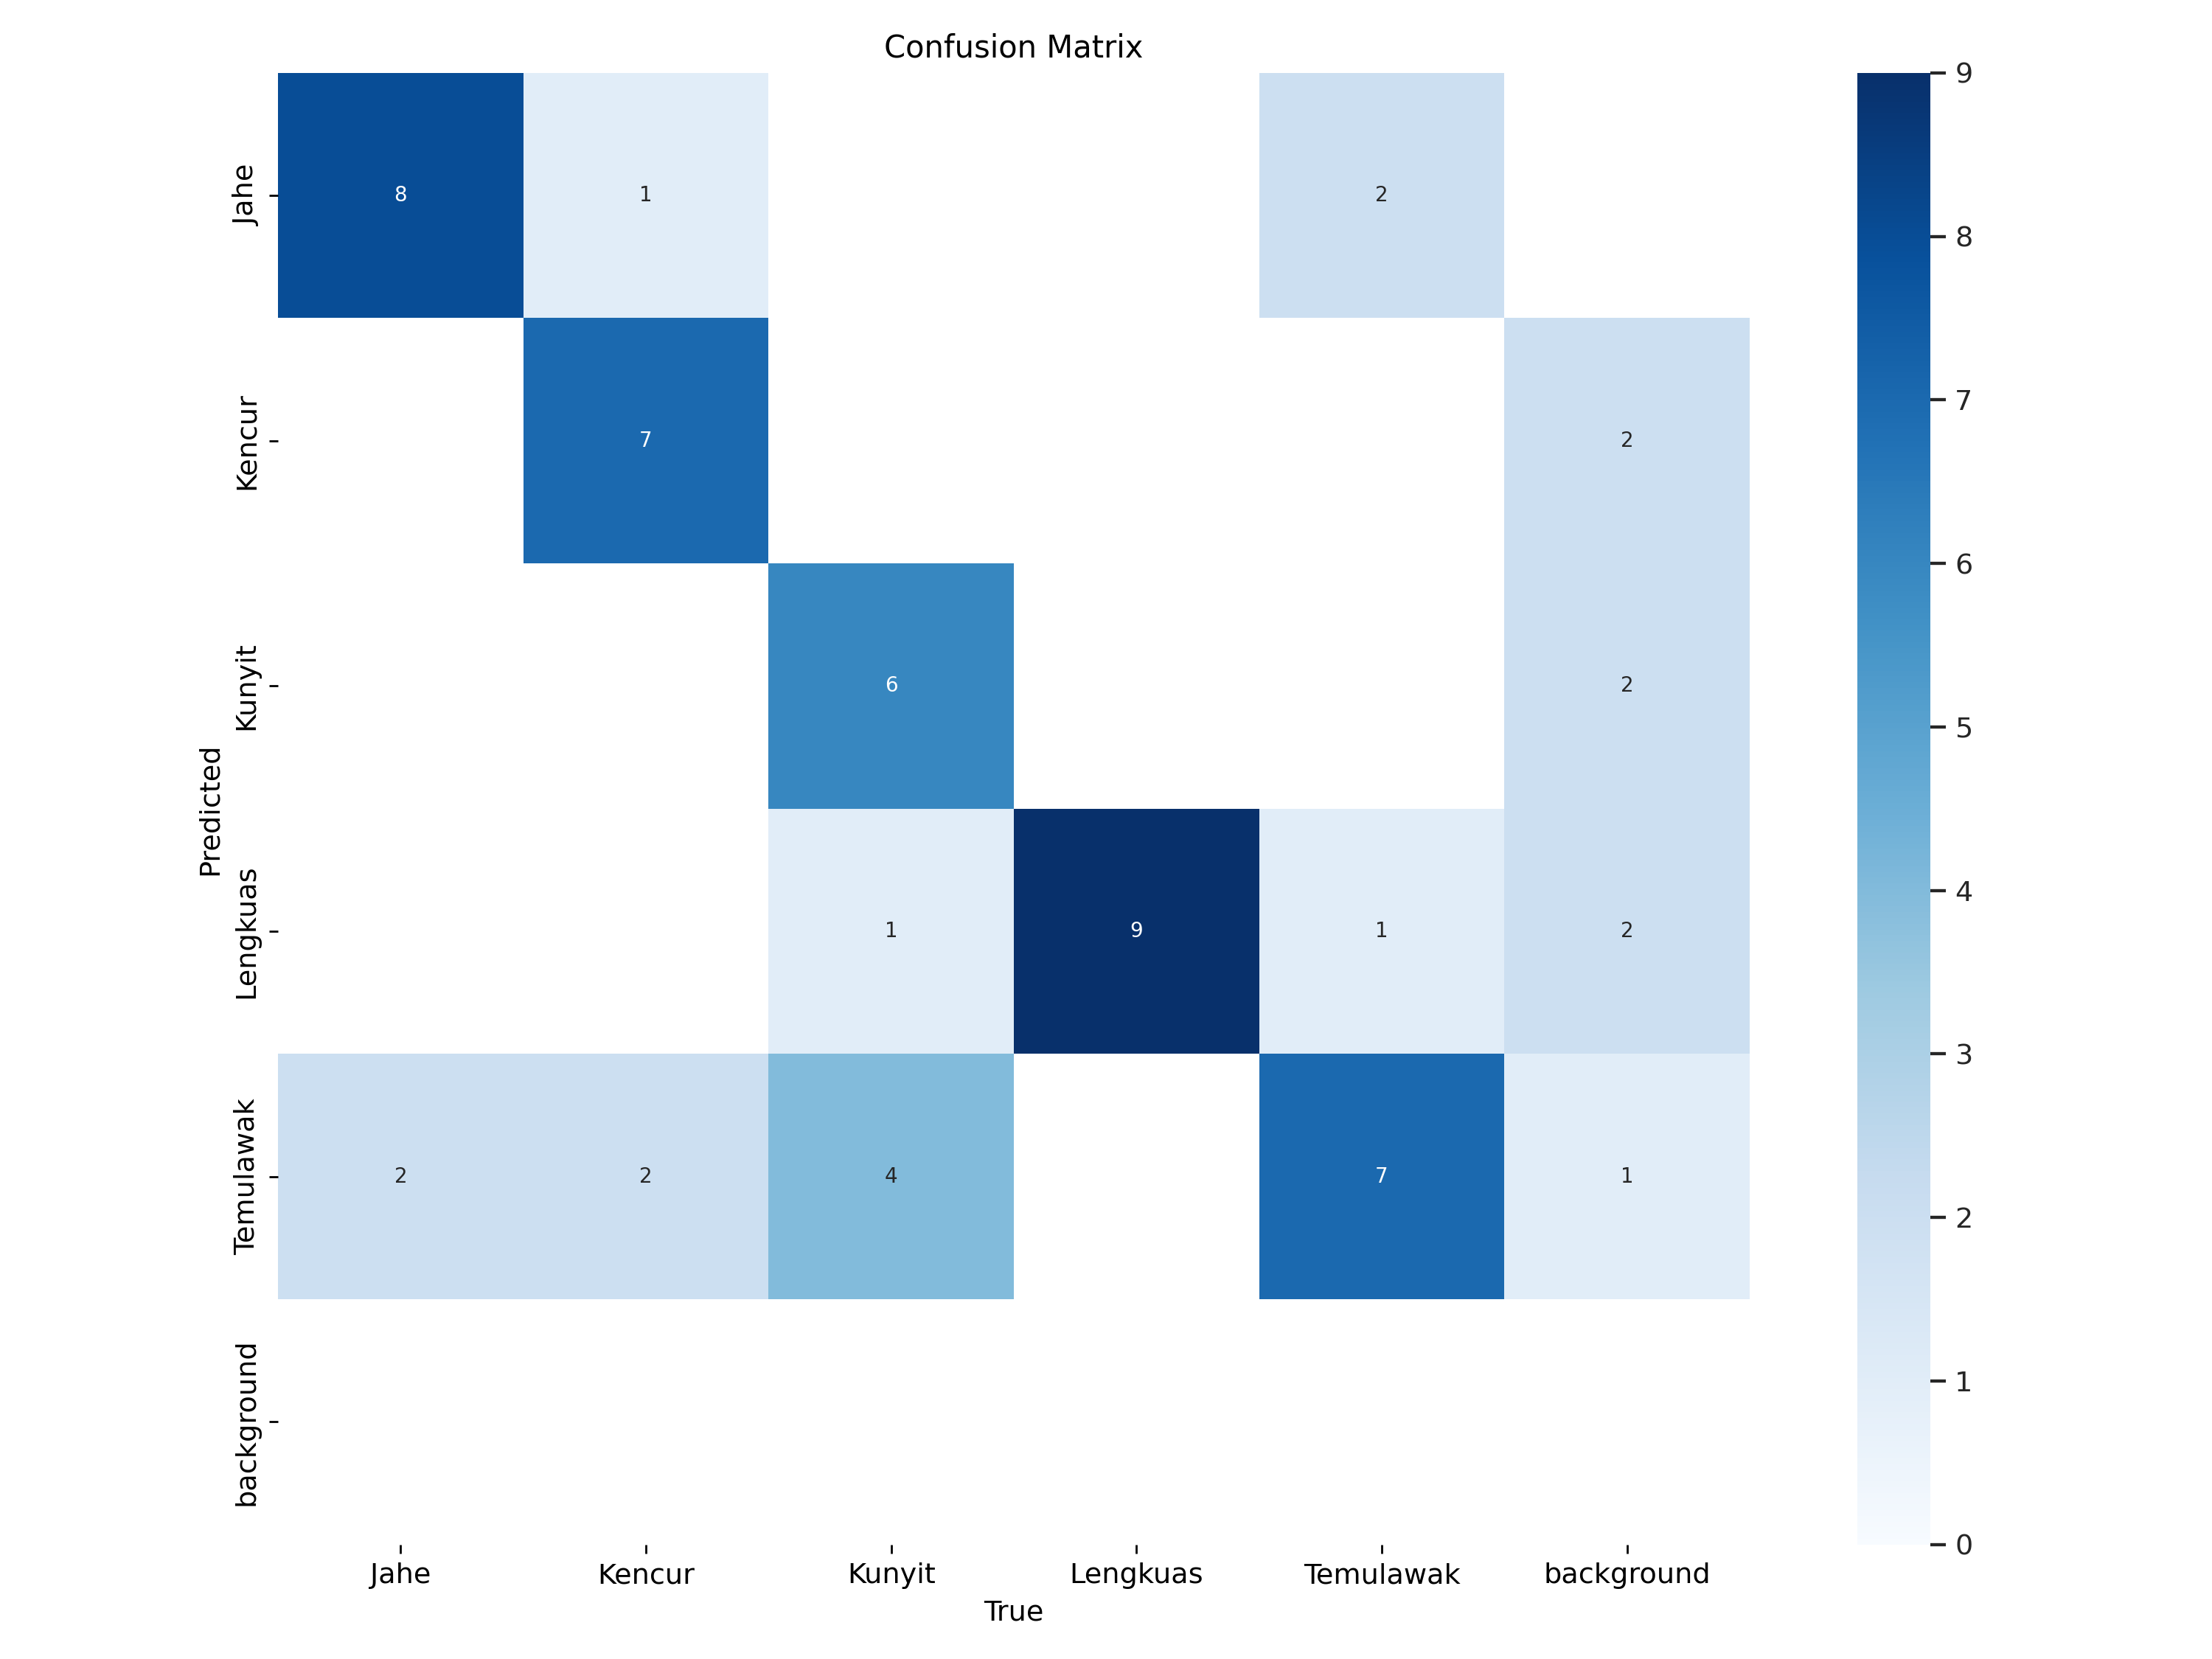

In [12]:
from IPython.display import Image

Image(filename=f'/kaggle/working/runs/detect/val/confusion_matrix.png', width=600)

In [13]:
!zip -r hasil_training_e100b16.zip /kaggle/working/runs

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/IMG_20250424_085939_jpg.rf.8011c90a159252833ee43b78ac6d9f63.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/predict/IMG_20250424_085415_jpg.rf.51bd73015449b3da535877523df83a48.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/predict/IMG_20250424_085728_jpg.rf.0176913cb97d0dc613d5addcca405a5f.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/predict/IMG_20250424_085519_jpg.rf.f16927f8fd876ce9bcb3f3640c787cdb.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/predict/IMG_20250424_085650_jpg.rf.df087de1492731989e2da61e4bd77c31.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/predict/IMG_20250424_085253_jpg.rf.a8e2ea9cd5aa1d109b1998995f35bcd5.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/predict/IMG_20250424_085145_jpg.rf.de311b1fa3c9f0bd8ca541800bbcca99.